# ISF 189 Module

Welcome to lab! Please read this lab in its entirety, as the analysis will make a lot more sense with the background context provided.

This lab is intended to be a hands-on introduction to data science as it can be applied to SES (socio-economic status). 

SES is often measured in variables of salary, parental education, occupation status, and other factors. Historically, income has been treated as the defining factor of SES, and there have been many research studies showing that SES as defined by income is the leading factor for school performance in test scores. If you are interested in learning more, you can visit the American Psychological Association to see more research: http://www.apa.org/pi/ses/resources/publications/education.aspx

Today we are going to suggest using real-world data that this may not be the case. We are going to give you the chance to explore and toggle between different variables to define SES and how much importance to assign to each variable. **Data science is not just about plugging in the numbers, it is about making many decisions and backing up those decisions with quantitative reasoning.** This can have implications later in how the world treats SES and public policy suggestions.

In addition, we are going to suggest that the defining variable for SES might not even be income, but rather family wealth, that provides a more accurate prediction for school performance. 

There is no standard method of measuring SES. In this lab, we are going to define SES in the following ways:

1. SES is a positive number that represents the ratio: $\displaystyle \frac {\text{individual SES}} {\text{median US SES}}$   where 1 means that this individual is exactly at the median SES. This number will always be positive because we are assuming that there will be no cases of negative wealth.
<br>

2. individual SES is a number such that 

$SES = p_i * \text{income score} + p_e * \text{years of education}$ 

where $p_i$ is the importance we assign to income on a scale of 0 to 1 and $p_e$ is the importance we assign to years of education on a scale of 0 to 1. Throughout this lab we will be changing the values of $p_i$ and $p_e$ but it is important to remember that these values *must add up to 1*. Our default values at first are $p_i$ = 0.8 and $p_e$ = 0.2.
<br>


Income score is a score assigned to each income bracket to ensure that all our factors are on the same scale. Our income scores are defined as follows:

### Table 1: Income Scores

<table>
  <tr>
    <th>Income Score</th>
    <th>Income Bracket (\$) </th>
  </tr>
  <tr>
    <td>1</td>
    <td>less than \$10,000</td>
  </tr>
 <tr>
    <td>2</td>
    <td>\$15,000 - \$19,999</td>
  </tr>
  <tr>
    <td>3</td>
    <td>\$20,000 - \$24,999</td>
  </tr>
  <tr>
    <td>4</td>
    <td>\$25,000 - \$29,999</td>
  </tr>
  <tr>
    <td>5</td>
    <td>\$30,000 - \$34,999</td>
  </tr>
    <tr>
    <td>6</td>
    <td>\$35,000 - \$39,999</td>
  </tr>
    <tr>
    <td>7</td>
    <td>\$40,000 - \$44,999</td>
  </tr>
    <tr>
    <td>8</td>
    <td>\$45,000 - \$49,999</td>
  </tr>
    <tr>
    <td>9</td>
    <td>\$50,000 - \$59,999</td>
  </tr>
   <tr>
    <td>10</td>
    <td>\$60,000 - \$74,999</td>
  </tr> 
   <tr>
    <td>11</td>
    <td>\$75,000 - \$99,999</td>
  </tr>   
   <tr>
    <td>12</td>
    <td>\$100,000 - \$124,999</td>
  </tr> 
   <tr>
    <td>13</td>
    <td>\$125,000 - \$149,999</td>
  </tr> 
   <tr>
    <td>14</td>
    <td>\$150,000 - \$199,999</td>
  </tr>
   <tr>
    <td>15</td>
    <td>\$200,000 or more</td>
  </tr> 
</table>

As you work through the lab, there will be lab assistants in the room to answer any of your questions. If you get stuck at any point, feel free to ask a neighbor or one of the lab assistants for help.

## What This Lab Will Cover
1. Running Jupyter Notebooks
2. Data Analysis
3. Visualization & Interpretation 

## What you need to do:
* Read the content, complete the questions 
* Analyze the data
* Submit the assignment

# 1. Running Jupyter Notebooks

You are currently working in a Jupyter Notebook. A Notebook allows text and code to be combined into one document. Each rectangular section of a notebook is called a "cell." There are two types of cells in this notebook: text cells and code cells. 

Jupyter allows you to run simulations and regressions in real time. To do this, select a code cell, and click the "run cell" button at the top that looks like ▶| to confirm any changes. Alternatively, you can hold down the `shift` key and then press `return` or `enter`.

In the following simulations, anytime you see `In [ ]` you should click the "run cell" button to see output. **If you get an error message after running a cell, go back to the beginning of the lab and make sure that every previous code cell has been run.**

## 1.1 Importing Modules

First we need to import some modules so that we can call the functions from within. We are going to use these functions to manipulate data tables and conduct math operations. Run the code cell below to import these modules.

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib inline

## 1.2 Reading Data
In order to examine the how the weighting of these variables affects SES, we are going to examine datasets from the 5-year American Community Survey (ACS). The American Community Survey is an ongoing statistical survey by the U.S. Census Bureau. In this table, we have consolidated household income (inflation adjusted dollar) and years of education (educational attainment), and Food Stamps/Supplemental Nutrition Assistance Program (SNAP) status data for 4 different ethnicities. Run the code cell below to read in the data.
<br>Source: https://factfinder.census.gov

In [2]:
educ = Table.read_table('data/totaleduc.csv')
educbyrace = Table.read_table('data/educbyrace.csv')
income = Table.read_table('data/totalincome.csv')
incomebyrace = Table.read_table('data/incomebyrace.csv')
wealthscoretable = Table.read_table('data/wealthscore.csv')
wealthbyrace = Table.read_table('data/wealthbyrace.csv')
lorenzdata = Table.read_table('data/lorenzdata.csv')

In [3]:
educ

Educational Attainment,Male,Female,Total Estimate,Cumulative Population
Total,"102,007,511","109,455,011","211,462,522","211,462,522"
No schooling completed,"1,433,002","1,541,446","2,974,448","2,974,448"
Nursery to 4th grade,"828,764","844,074","1,672,838","4,647,286"
5th and 6th grade,"1,744,550","1,706,996","3,451,546","8,098,832"
7th and 8th grade,"1,997,412","1,997,625","3,995,037","12,093,869"
9th grade,"1,814,562","1,682,023","3,496,585","15,590,454"
10th grade,"2,120,597","2,026,065","4,146,662","19,737,116"
11th grade,"2,391,837","2,306,193","4,698,030","24,435,146"
"12th grade, no diploma","1,991,470","1,802,478","3,793,948","28,229,094"
High school graduate (includes equivalency),"28,952,834","29,769,694","58,722,528","86,951,622"


# Initial SES Comparison

We are going to analyze SES in relation to race, first by determining the ratio of how the average SES (income) for a specific race (e.g. African American) compares in relation to the average SES (income) for all US citizens.

Then we are going to find the same ratio again, but this time with average African American SES (wealth) in relation to average SES (wealth) for all US citizens.

This may give an indication of how including wealth as a factor can dramatically change SES index values.

Henceforth, all references to SES will refer to the standard income definition of SES.

Then we are going to change the weightings used in SES and see how that impacts our SES index and performance ranking.

First we are going to determine the ratio:

$\displaystyle \frac {\text{average SES for African Americans}} {\text{average SES for all US citizens}}$

We are going to look specifically at 2 variables: income and years of education. 
The following table displays information for income for African-Americans.

In [4]:
aaincome = incomebyrace.select(0,1)
aaincome.show()

Income Bracket ($),Total Estimate (African American)
Total,"14,186,983"
"less than 10,000","2,055,646"
"10,000 - 14,999","1,200,275"
"15,000 - 19,999","1,036,925"
"20,000 - 24,999","963,763"
"25,000 - 29,999","871,472"
"30,000 - 34,999","852,511"
"35,000 - 39,999","733,425"
"40,000 - 44,999","685,742"
"45,000 - 49,999","574,233"


The following table displays the same information regarding income for all US citizens in aggregate: 

In [5]:
income.show()

Income Bracket ($),Total Estimate
Total,"116,926,305"
"less than 10,000","8,421,482"
"10,000 - 14,999","6,161,477"
"15,000 - 19,999","6,139,644"
"20,000 - 24,999","6,227,524"
"25,000 - 29,999","5,852,048"
"30,000 - 34,999","5,951,926"
"35,000 - 39,999","5,436,927"
"40,000 - 44,999","5,428,388"
"45,000 - 49,999","4,807,116"


In [6]:
# Code to remove commas and coerce into integers for manipulation later
preincomes = income.column("Total Estimate")
total = 0
estimate = []
for x in preincomes:
    n = (int)(x.replace(",", ""))
    total =  (total + (n))
    estimate.append(total)    
income = Table().with_columns(
    "Income Bracket ($)", income[' Income Bracket ($)'], 
    "Total Estimate", estimate)

In [7]:
educ.show()

Educational Attainment,Male,Female,Total Estimate,Cumulative Population
Total,"102,007,511","109,455,011","211,462,522","211,462,522"
No schooling completed,"1,433,002","1,541,446","2,974,448","2,974,448"
Nursery to 4th grade,"828,764","844,074","1,672,838","4,647,286"
5th and 6th grade,"1,744,550","1,706,996","3,451,546","8,098,832"
7th and 8th grade,"1,997,412","1,997,625","3,995,037","12,093,869"
9th grade,"1,814,562","1,682,023","3,496,585","15,590,454"
10th grade,"2,120,597","2,026,065","4,146,662","19,737,116"
11th grade,"2,391,837","2,306,193","4,698,030","24,435,146"
"12th grade, no diploma","1,991,470","1,802,478","3,793,948","28,229,094"
High school graduate (includes equivalency),"28,952,834","29,769,694","58,722,528","86,951,622"


In [8]:
# Code to remove commas and coerce into integers for manipulation later
preeduc = educ.column("Total Estimate")
total = 0
estimate = []
for i,x in enumerate(preeduc):
    n = (int)(x.replace(",", ""))
    if i > 0:
        total =  (total + (n))
        estimate.append(total) 
    else:
        estimate.append(n)

educ = Table().with_columns(
    "Educational Attainment", educ['Educational Attainment '], 
    "Total Estimate", estimate,
    "Cumulative Population", educ['Cumulative Population'])

In [9]:
educ.show()

Educational Attainment,Total Estimate,Cumulative Population
Total,211462522,"211,462,522"
No schooling completed,2974448,"2,974,448"
Nursery to 4th grade,4647286,"4,647,286"
5th and 6th grade,8098832,"8,098,832"
7th and 8th grade,12093869,"12,093,869"
9th grade,15590454,"15,590,454"
10th grade,19737116,"19,737,116"
11th grade,24435146,"24,435,146"
"12th grade, no diploma",28229094,"28,229,094"
High school graduate (includes equivalency),86951622,"86,951,622"


In [10]:
# Calculate the median years of education for the total US population
educ['Total Estimate'][0]/2

105731261.0

Which population bracket does this fall under?

If we wanted to roughly quantify median years of education it falls between "Some college, less than 1 year" and "Some college, 1 or more years, no degree" is approximately 12.5


In [11]:
#Assign this to the variable 'mededuc'
mededuc = 12.5

We have already crunched some numbers for you, to get the following data:

<li>median income for African Americans: $37,500</li>
<li>median years of school for African Americans: 13 years of school</li>

<li>median income for all US citizens: $55,000</li>
<li>median years of school for all US citizens: 12.5 years of school</li>

Source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_B15002&prodType=table

From here we're going to use weightings of $p_i$ = 0.8 and $p_e$ 0.2 to calculate our SES. Recall that our formula for SES is:

$p_i * \text{income score} + p_e * \text{years of education}$

Recall income scores from Table 1: Income Scores


<table>
  <tr>
    <th>Income Score</th>
    <th>Income Bracket (\$) </th>
  </tr>
  <tr>
    <td>1</td>
    <td>less than \$10,000</td>
  </tr>
 <tr>
    <td>2</td>
    <td>\$15,000 - \$19,999</td>
  </tr>
  <tr>
    <td>3</td>
    <td>\$20,000 - \$24,999</td>
  </tr>
  <tr>
    <td>4</td>
    <td>\$25,000 - \$29,999</td>
  </tr>
  <tr>
    <td>5</td>
    <td>\$30,000 - \$34,999</td>
  </tr>
    <tr>
    <td>6</td>
    <td>\$35,000 - \$39,999</td>
  </tr>
    <tr>
    <td>7</td>
    <td>\$40,000 - \$44,999</td>
  </tr>
    <tr>
    <td>8</td>
    <td>\$45,000 - \$49,999</td>
  </tr>
    <tr>
    <td>9</td>
    <td>\$50,000 - \$59,999</td>
  </tr>
   <tr>
    <td>10</td>
    <td>\$60,000 - \$74,999</td>
  </tr> 
   <tr>
    <td>11</td>
    <td>\$75,000 - \$99,999</td>
  </tr>   
   <tr>
    <td>12</td>
    <td>\$100,000 - \$124,999</td>
  </tr> 
   <tr>
    <td>13</td>
    <td>\$125,000 - \$149,999</td>
  </tr> 
   <tr>
    <td>14</td>
    <td>\$150,000 - \$199,999</td>
  </tr>
   <tr>
    <td>15</td>
    <td>\$200,000 or more</td>
  </tr> 
</table>

Using the information above, find the SES for a median African American individual. Enter this value in the cell below.

Find the SES for the median US citizen. Enter this value in the cell below.

Find SES (income). Recall the formula for SES (income):

$p_i * \text{income score} + p_e * \text{years of education}$

We will now explore how the value of SES that we got above changes when we change the leading factor for SES from income to wealth. We will measure wealth through net worth data displayed below from the 2013 Census. 

In [12]:
wealthbyrace.show()

Characteristic,Net Worth
Total,"80,039"
White alone,"103,963"
"White alone, not Hispanic","132,483"
Black alone,"9,211"
Asian alone,"112,250"
Other (residual),"13,703"
Hispanic origin (any race),"12,460"
Not of Hispanic origin,"99,394"


Similar to how we assigned an income score to each income bracket above, we will assign a wealth score to each wealth bracket. The wealth score table is displayed below:

In [13]:
wealthscoretable.show()

Wealth Score,Wealth Bracket
1,$0 - $10000
2,$10001 - $20000
3,$20001 - $30000
4,$30001 - $40000
5,$40001 - $50000
6,$50001 - $60000
7,$60001 - $70000
8,$70001 - $80000
9,$80001 - $90000
10,$90001 - $100000


Let us now calculate SES wealth using the new formula using the wealth score as defined below: 

Recall the formula: 
<br>
<br>
$p_w * \text {wealth score} + p_e * \text {years of education}$, 
<br>
<br>
where $p_w$ and $p_e$ retain the same weights as before, 0.8 and 0.2 respectively.

Enter in your value for SES (wealth) for an average US citizen (total wealth) and an average African American below.

Compare your values for SES (income) and SES (wealth) for both the average US citizen and the average African American. What are the implications of having different SES values?

# Changing SES Weights

Moving foward, we will only be using SES (income). Anytime in the later text in which this lab references, we are referring to SES (income), defined as:
<br>
<br>
$p_i * \text{income score} + p_e * \text{years of education}$, 
<br>
<br>
Up to this point, we have maintained weights of $p_i$ = 0.8 and $p_e$ = 0.2. These weights are arbitrary numbers that sum up to 1.0 chosen by how much importance we assign to a factor in our SES index value. In this case, we say that 80% of our SES index is determined by income and 20% is determined by years of education.

We will now experiment with toggling between different weightings for SES. 

We are going to take the case of Jim: an African-American with an income of $35,000$ and 16 years of education. First we will compute the ratio of $\displaystyle \frac {\text{individual SES}} {\text{median US SES}}$, and then we will compute $\displaystyle \frac {\text{individual SES}} {\text{median African American SES}}$.


Recall the information that was provided earlier:

median income for African Americans: $37,500
<br>
median years of school for African Americans: 13 years of school

median income for all US citizens: $55,000
<br>
median years of school for all US citizens: 12.5 years of school

In [14]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

#Enter value for income median
african_income_median = 37500
african_income_median_score = 6

#Enter value for education median
african_education_median = 13

def calculateSES(p_i, income_median_score, education_median):
    p_e = 100 - p_i
    return p_i* 0.01 * income_median_score + p_e * 0.01 * education_median

interact(calculateSES, p_i = (0, 100), income_median_score = (1, 15), education_median = (0, 24));

#Source: http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html 

10.0

Use the slider above. (If you don't see three sliders, make sure you have run the code cell.) The numbers are in percent, so 80 on the slider corresponds to 80% for $p_i$. Recall that $p_i + p_e = 1$ so automatically this means that $p_e$ = 20%. Compute his $\displaystyle \frac {\text{individual SES}} {\text{median US SES}}$ using weightings of 0.8 and 0.2. Recall Table 1: Income Scores at the top of this lab. Is he overperforming or underperforming?

Compute his $\displaystyle \frac {\text{individual SES}} {\text{median African American SES}}$. Is he overperforming or underperforming?

Now lets change the weights to 0.5 and 0.5. Compute his $\displaystyle \frac {\text{individual SES}} {\text{median US SES}}$. Is he overperforming or underperforming?

Compute his $\displaystyle \frac {\text{individual SES}} {\text{median African American SES}}$ with weights of 0.5 and 0.5. Is he overperforming or underperforming?

How does the importance that we place on certain factors affect Jim's socio-economic status?

Let's change the weightings further: 0.2 for $p_i$ and 0.8 for $p_e$. Calculate the median SES for African Americans.

Calculate the median SES for all US citizens using the same weights of 0.2 and  0.8.

Are African Americans overperforming or underperforming in relation to all US citizens?

How does this compare to values that you found previously with weights of 0.8 $p_i$ and 0.2 $p_e$?

Suppose there was a public policy initiative to provide increased funding to households of low socio-economic status. The board of this policy is debating if they should focus specially on publicizing this initiative to a certain African American community. How would their decision change based on the SES values that we found?

Write up for each of the following:

1. What are some other factors that can influence SES. How would you measure them?

2. What are some other aspects other than test scores and school performance that can be influenced by SES. How would you measure them?

Data science involves making decisions like assigning weights to factors to determine SES indices. These decisions are often ambiguous and do not readily provide a clear answer, but the insights and the conclusions that we draw can influence public policy decisions. One important objective of this lab was to demonstrate that data science isn't always clear cut and involves making judgment calls as well.

## 2.3 Income Inequality benchmarks- the Lorenz Curve & Gini Coefficent

![alt text](LorenzCurve.jpg "Lorenz Curve")

Pictured above is a standard Lorenz Curve. We can depict the concentration of wealth using two interlinked methods: the Lorenz Curve and the Gini Coefficient.  The Lorenz curve is a graphical illustration of this and the Gini Coefficient is a numeric representation (a ratio).  
The Lorenz curve lines up the population from poorest to richest on the x axis, and then the y-axis graphs cumulative income of all the people poorer than the one on the x axis.  To make these comparable across countries, these are translated into percentages.  
(0,0) and (100,100) are always the end points of the curve: 0% of the people own nothing while 100% of the people own 100% of the wealth.  

Let's line up our individual income earners to look at inequality just among income earners.  Let's start with a fresh table, with the column of the income.  Let's put the table of incomes in order from lowest to highest.  Then let's make a new column, that adds up all incomes above the row.  Here's an example:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-baqh">Income</th>
    <th class="tg-baqh">Cumulative Income</th>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">3</td>
  </tr>
  <tr>
    <td class="tg-baqh">3</td>
    <td class="tg-baqh">6</td>
  </tr>
  <tr>
    <td class="tg-baqh">4</td>
    <td class="tg-baqh">10</td>
  </tr>
  <tr>
    <td class="tg-baqh">7</td>
    <td class="tg-baqh">17</td>
  </tr>
  <tr>
    <td class="tg-baqh">8</td>
    <td class="tg-baqh">26</td>
  </tr>
</table>

In [15]:
# Total US
lorenzdata.show()

Income Bracket (less than),Total Estimate
"10,000","8,421,482"
"14,999","6,161,477"
"19,999","6,139,644"
"24,999","6,227,524"
"29,999","5,852,048"
"34,999","5,951,926"
"39,999","5,436,927"
"44,999","5,428,388"
"49,999","4,807,116"
"59,999","9,192,915"


The left column shows the upper bound of each income bracket, and the right column shows the number of people that fall in that bracket. We want to construct a table of income and cumulative income. 

In [16]:
ordered_incomes = lorenzdata.column("Income Bracket (less than)")

total = 0
cumulative_step = []
for x in ordered_incomes:
    n = (int)(x.replace(",", ""))
    total =  (total + (n))
    cumulative_step.append(total)
    
lorenz_table = Table().with_columns(
    ["Income", ordered_incomes],
    ["Cumulative Incomes", cumulative_step])

lorenz_table.show()

Income,Cumulative Incomes
"10,000",10000
"14,999",24999
"19,999",44998
"24,999",69997
"29,999",99996
"34,999",134995
"39,999",174994
"44,999",219993
"49,999",269992
"59,999",329991


Next we want to calculate what proportion of the population is in each income bracket. We do this by dividing each cell of the column "Cumulative Income" with the number in last cell 1,179,986 which represents the total population.

In [17]:
total_income = 1179986
percents = []
for x in cumulative_step:
    percent = x / total_income
    percents.append(percent)
    
lorenz_table = Table().with_columns(
    ["Income", ordered_incomes],
    ["Cumulative Incomes", cumulative_step],
    ["Percent Income", percents])

lorenz_table.show()

Income,Cumulative Incomes,Percent Income
"10,000",10000,0.00847468
"14,999",24999,0.0211858
"19,999",44998,0.0381344
"24,999",69997,0.0593202
"29,999",99996,0.0847434
"34,999",134995,0.114404
"39,999",174994,0.148302
"44,999",219993,0.186437
"49,999",269992,0.228809
"59,999",329991,0.279657


Notice how the last cell in the "Percent Income" column reads 1. This is a good check that we are on the right direction, but each value in the "Percent Income" column is $\frac {\text {income at that cumulative step}} {\text {total income}}$. Now we are going to create a "Cumulative Population" column similar to how we created "Cumulative Incomes".

In [18]:
population = lorenzdata.column("Total Estimate")

total_pop = 0
cumulative_pop = []
for x in population:
    n = (int) (x.replace(",", ""))
    total_pop =  (total_pop + (n))
    cumulative_pop.append(total_pop)
    
lorenz_table = Table().with_columns(
    ["Income", ordered_incomes],
    ["Cumulative Incomes", cumulative_step],
    ["Percent Income", percents],
    ["Population", population],
    ["Cumulative Population", cumulative_pop])

lorenz_table.show()


Income,Cumulative Incomes,Percent Income,Population,Cumulative Population
"10,000",10000,0.00847468,"8,421,482",8421482
"14,999",24999,0.0211858,"6,161,477",14582959
"19,999",44998,0.0381344,"6,139,644",20722603
"24,999",69997,0.0593202,"6,227,524",26950127
"29,999",99996,0.0847434,"5,852,048",32802175
"34,999",134995,0.114404,"5,951,926",38754101
"39,999",174994,0.148302,"5,436,927",44191028
"44,999",219993,0.186437,"5,428,388",49619416
"49,999",269992,0.228809,"4,807,116",54426532
"59,999",329991,0.279657,"9,192,915",63619447


Now we're going to create a "Percent Population" column.

In [19]:
total_pop = 116926305
pop_percent = []

for i in cumulative_pop:
    p = i / total_pop
    pop_percent.append(p)
    
lorenz_table = Table().with_columns(
    ["Income", ordered_incomes],
    ["Cumulative Incomes", cumulative_step],
    ["Percent Income", percents],
    ["Population", population],
    ["Cumulative Population", cumulative_pop],
    ["Percent Population", pop_percent])

lorenz_table.show()

Income,Cumulative Incomes,Percent Income,Population,Cumulative Population,Percent Population
"10,000",10000,0.00847468,"8,421,482",8421482,0.0720238
"14,999",24999,0.0211858,"6,161,477",14582959,0.124719
"19,999",44998,0.0381344,"6,139,644",20722603,0.177228
"24,999",69997,0.0593202,"6,227,524",26950127,0.230488
"29,999",99996,0.0847434,"5,852,048",32802175,0.280537
"34,999",134995,0.114404,"5,951,926",38754101,0.33144
"39,999",174994,0.148302,"5,436,927",44191028,0.377939
"44,999",219993,0.186437,"5,428,388",49619416,0.424365
"49,999",269992,0.228809,"4,807,116",54426532,0.465477
"59,999",329991,0.279657,"9,192,915",63619447,0.544099


Now, with this table constructed, we are ready to graph the Lorenz Curve!

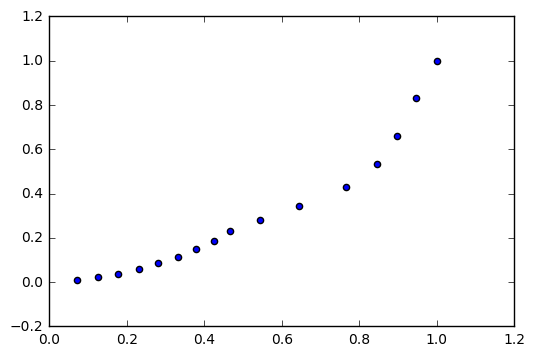

In [20]:
x_values = lorenz_table['Percent Population']
y_values = lorenz_table['Percent Income']

plt.scatter(x_values, y_values)

## Calculate the Gini coefficient:
The Gini coefficient is the area between the line and the 45% line.  It is the sum of the differences between Percent Population and Percent Income divided by the sum of Percent Population.  This number is between 0 and 1.  Consider if a smaller number represents more inequality and what the relationship of the formula to the graph is. The higher the Gini-coefficient is, the more unequal is the distribution of the thing being distributed across the population in question.  

$$ \frac{\Sigma_{i=1}^{N} (\% Pop_i - \% Inc_i)}{\Sigma_{i=1}^{N} \% Pop_i}$$

Note that if there were perfect equality, $\% Pop_i = \% Inc_i$.

Below we are going to create a column "Differences" that will hold the values of "Percent Population" - "Percent Income"

In [21]:
from operator import sub
differences = map(sub, pop_percent, percents)

lorenz_table = Table().with_columns(
     ["Income", ordered_incomes],
     ["Cumulative Incomes", cumulative_step],
     ["Percent Income", percents],
     ["Population", population],
     ["Cumulative Population", cumulative_pop],
     ["Percent Population", pop_percent],
     ["Differences", differences])

lorenz_table.show() 

Income,Cumulative Incomes,Percent Income,Population,Cumulative Population,Percent Population,Differences
"10,000",10000,0.00847468,"8,421,482",8421482,0.0720238,0.0635492
"14,999",24999,0.0211858,"6,161,477",14582959,0.124719,0.103533
"19,999",44998,0.0381344,"6,139,644",20722603,0.177228,0.139094
"24,999",69997,0.0593202,"6,227,524",26950127,0.230488,0.171168
"29,999",99996,0.0847434,"5,852,048",32802175,0.280537,0.195794
"34,999",134995,0.114404,"5,951,926",38754101,0.33144,0.217036
"39,999",174994,0.148302,"5,436,927",44191028,0.377939,0.229637
"44,999",219993,0.186437,"5,428,388",49619416,0.424365,0.237928
"49,999",269992,0.228809,"4,807,116",54426532,0.465477,0.236668
"59,999",329991,0.279657,"9,192,915",63619447,0.544099,0.264442


To calculate the Gini coefficient, we need the sum of all the differences. The code cell below is going to find that sum.

In [22]:
# also the actual sum for the column of differences gives a value of 3.1609032
# after division the Gini coefficient is supposed to be less than 1

sum = 0
differences = lorenz_table.column("Differences")
for d in differences:
    sum = sum + d
sum

3.1609041101371704

Find the Gini coefficient for all US citizens. 

Divide the sum of the differences by ${\Sigma_{i=1}^{N} \% Pop_i}$. This is your Gini coefficient for all US citizens. Enter your value below.

In [23]:
denom = 0;
denom_list = lorenz_table.column("Percent Population")
for d in denom_list:
    denom += d;
sum / denom

0.38894034205111178

Let's do the same thing and find the Gini coefficient for African Americans. The income data for African Americans is displayed below.

In [24]:
aaincome.show()

Income Bracket ($),Total Estimate (African American)
Total,"14,186,983"
"less than 10,000","2,055,646"
"10,000 - 14,999","1,200,275"
"15,000 - 19,999","1,036,925"
"20,000 - 24,999","963,763"
"25,000 - 29,999","871,472"
"30,000 - 34,999","852,511"
"35,000 - 39,999","733,425"
"40,000 - 44,999","685,742"
"45,000 - 49,999","574,233"


Create another column with the difference from the 45 degree line to the actual proportion of the population that falls within a certain income range.

In [25]:
#create column

Find the sum of the column of differences.

In [26]:
#find sum

Divide it by ${\Sigma_{i=1}^{N} \% Pop_i}$. This is your Gini coefficient for African Americans. Enter your value below.

Is the African American population more or less unequal than the total US population? Explain some reasoning as to why this might be the case.

# Another Way of Showing Inequality: Boxplots

We want to see how inequality through wealth and income can vary through different races. One good way to demonstrate this is through boxplots*.

*A quick review of boxplots: boxplots highlight the median, upper quartile, lower quartile, and outliers in a set of data.

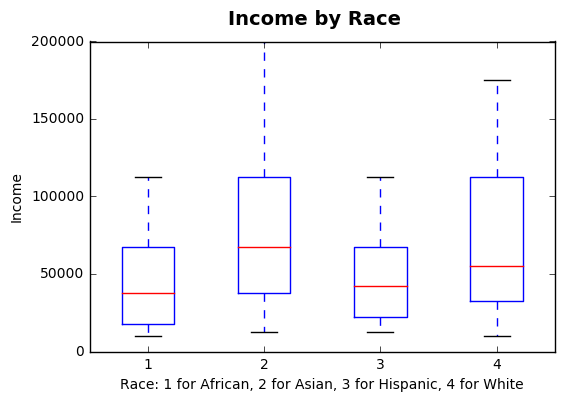

In [27]:
# African-American
african_bottom_income = 10000
african_lower_quartile_income = 17500
african_median_income = 37500
african_upper_quartile_income = 67500
african_top_income = 112500

african = [african_bottom_income, african_lower_quartile_income, african_median_income, 
           african_upper_quartile_income, african_top_income]

# Asian
asian_bottom_income = 12500
asian_lower_quartile_income = 37500
asian_median_income = 67500
asian_upper_quartile_income = 112500
asian_top_income = 200000

asian = [asian_bottom_income, asian_lower_quartile_income, asian_median_income, 
           asian_upper_quartile_income, asian_top_income]

# Hispanic
hispanic_bottom_income = 12500
hispanic_lower_quartile_income = 22500
hispanic_median_income = 42500
hispanic_upper_quartile_income = 67500
hispanic_top_income = 112500

hispanic = [hispanic_bottom_income, hispanic_lower_quartile_income, hispanic_median_income, 
           hispanic_upper_quartile_income, hispanic_top_income]

# White
white_bottom_income = 10000
white_lower_quartile_income = 32500
white_median_income = 55000
white_upper_quartile_income = 112500
white_top_income = 175000

white = [white_bottom_income, white_lower_quartile_income, white_median_income, 
           white_upper_quartile_income, white_top_income]

demographic_income = [african, asian, hispanic, white]


# figure related code
fig = plt.figure()
fig.suptitle('Income by Race', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(demographic_income)

ax.set_xlabel('Race: 1 for African, 2 for Asian, 3 for Hispanic, 4 for White')
ax.set_ylabel('Income')


plt.show()

What conclusions can we draw from this box plot? Is the comparison for individual SES to aggregate US median SES the same as the comparison for individual SES to race median SES?